In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score


from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
from sklearn.metrics import plot_roc_curve,confusion_matrix

In [2]:
#Reading data
df = pd.read_csv("heart.csv")

### Checking the data

In [3]:
#Data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()
#From this it can be observed that there are no NULL or NAN values in the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#Printing the first 5 rows of data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#Printing the shape of the dataset
df.shape

(303, 14)

In [7]:
#Looking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#Lookking for Na values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#Data exploration for target values
df.target.value_counts()
#prints the count of people with and without heart disease

1    165
0    138
Name: target, dtype: int64

### Data Visualization

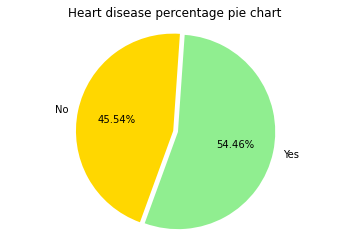

In [10]:
#Pie chart to depict percentage of people with heart disease in the given dataset

labels=["Yes","No"]
sizes=df.target.value_counts()
colors = [ 'lightgreen', 'gold']
explode = [0,0.05]
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct="%.2f%%",startangle=250)
plt.axis("equal")
plt.title("Heart disease percentage pie chart")
plt.show()

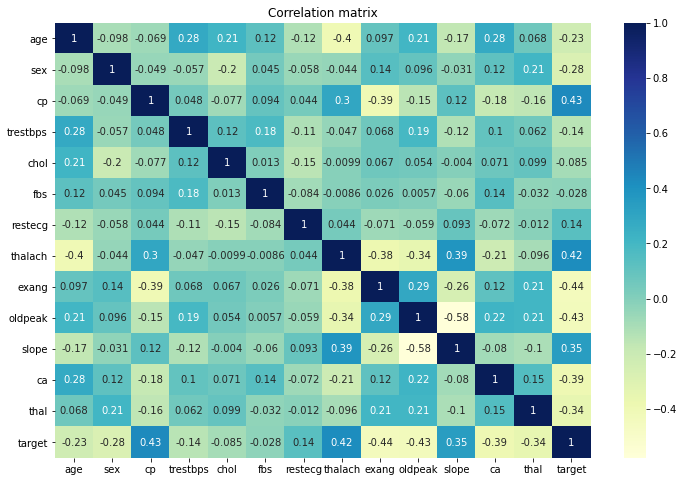

In [11]:
#Heatmap of the Correlation Matrix
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
plt.title("Correlation matrix")
g = sns.heatmap(df[top_corr_features].corr(), annot=True,cmap="YlGnBu")
plt.show()

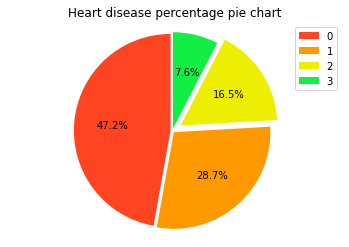

In [12]:
#Pie chart to depict the various types of chest pain percentage
sizes=df["cp"].value_counts()
colors = ["#FF4422","#FF9900","#EEEE00","#11EE44"]
explode = [0.02,0.02,0.1,0.02]
plt.pie(sizes,explode=explode,colors=colors,autopct="%.1f%%",startangle=90)
plt.axis("equal")
plt.legend(["0","1","2","3"])
plt.title("Heart disease percentage pie chart")
plt.show()

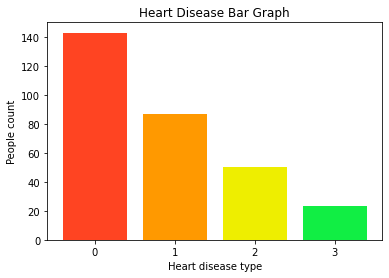

In [13]:
#Bar graph of Heart disease type and the number of people
plt.bar(["0","1","2","3"],df.cp.value_counts(),color=["#FF4422","#FF9900","#EEEE00","#11EE44"])
plt.xlabel("Heart disease type")
plt.ylabel("People count")
plt.title("Heart Disease Bar Graph")
plt.show()

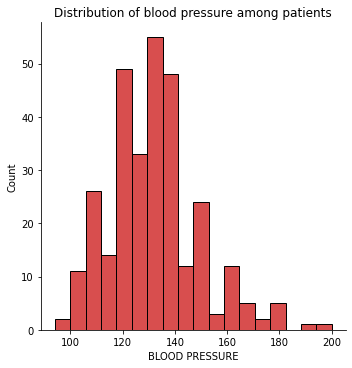

In [14]:
#Distribution plot of Resting blood pressure
from seaborn import displot
sns.displot(df["trestbps"],color="#CC1213")   
plt.title("Distribution of blood pressure among patients")
plt.xlabel("BLOOD PRESSURE")
plt.ylabel("Count")
plt.show()

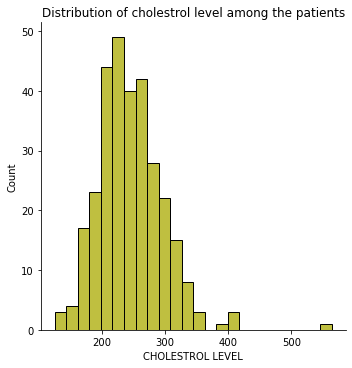

In [15]:
#Distribution of cholestrol level among the patients
sns.displot(df["chol"], color="#AAAA00")
plt.title("Distribution of cholestrol level among the patients")
plt.xlabel("CHOLESTROL LEVEL")
plt.ylabel("Count")
plt.show()

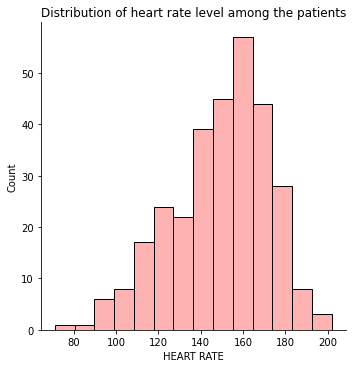

In [16]:
#Distribution of heart rate level among the patients
sns.displot(df["thalach"], color="#FF9999")
plt.title("Distribution of heart rate level among the patients")
plt.xlabel("HEART RATE")
plt.ylabel("Count")
plt.show()

C:\Users\anjan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


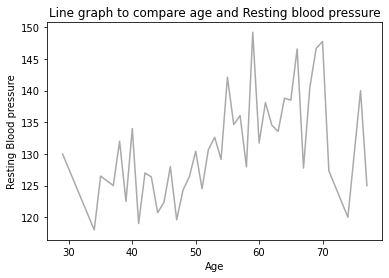

In [17]:
#Line graph to realise the age and Resting blood pressure relation
sns.lineplot(df.age,df.trestbps,err_style=None,color="darkgrey")
plt.xlabel("Age")
plt.ylabel("Resting Blood pressure")
plt.title("Line graph to compare age and Resting blood pressure")
plt.show()

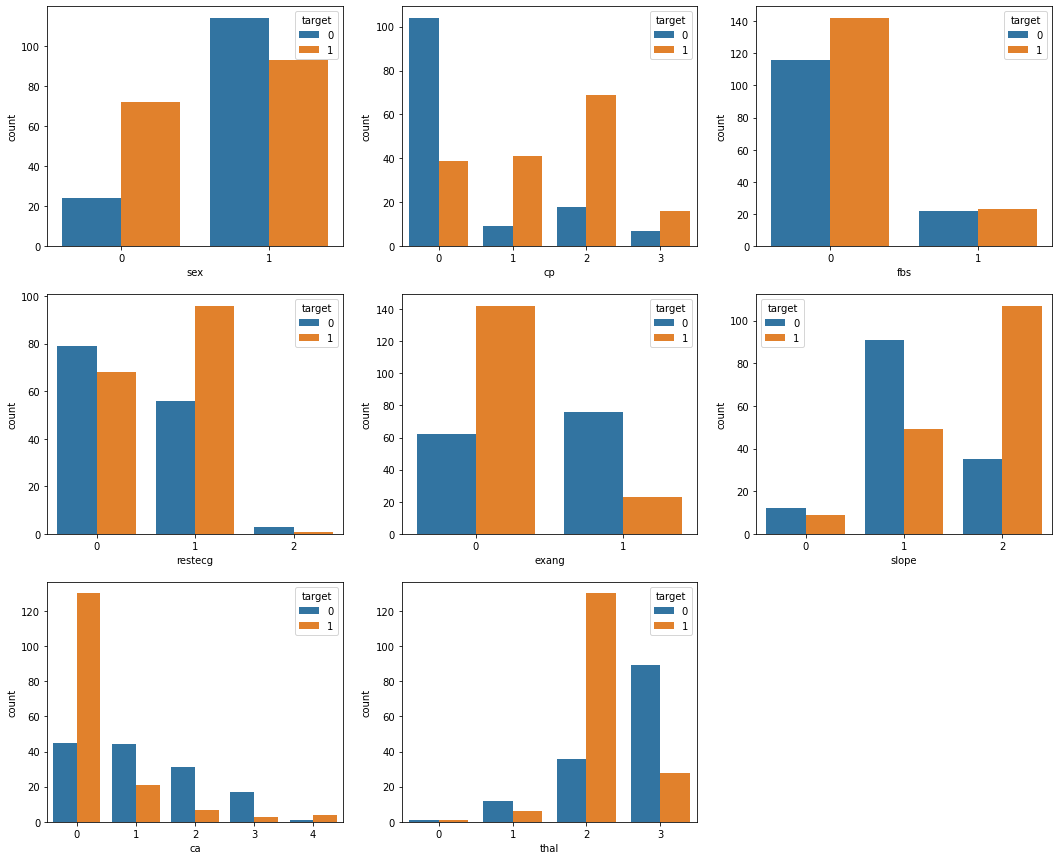

In [18]:
#Count of people with or without heart disease classified by various features
listA = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
m=1
plt.figure(figsize=(18,15))
for i in listA:
    plt.subplot(3,3,m)
    sns.countplot(x=i,data=df,hue='target')
    m+=1

## Pre-processing and modeling

In [19]:
#Creating Dummy variables
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [20]:
#Combining Dummy variables with dataframe
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [21]:
#Dropping original fields whose dummy variables were created
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


### Model Training

In [22]:
# Splitting data into target feature and other features
x = df.drop("target", axis=1)
y = df["target"]

In [23]:
# Splitting data into training and testing sets
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
#Creating dictionaries to store accuracy and recall values
accuracy_values={}
recall_values={}

### Logistic Regression

In [25]:
#Creating the logistic regression model
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

C:\Users\anjan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
#Predicting/testing the Logistic Regression model
y_pred_logistic=logistic_model.predict(x_test)

In [27]:
#Accuracy and recall values
print("Accuracy score : %0.3f"%accuracy_score(y_test,y_pred_logistic))
print("Recall score   : %0.3f"%recall_score(y_test,y_pred_logistic))
print("F1 score       : %0.3f"%f1_score(y_test,y_pred_logistic))

Accuracy score : 0.885
Recall score   : 0.844
F1 score       : 0.885


In [28]:
#Adding the accuracy scores to the dictionaries
accuracy_values["Logistic_Regression"]=accuracy_score(y_test,y_pred_logistic)*100
recall_values["Logistic_Regression"]=recall_score(y_test,y_pred_logistic)*100

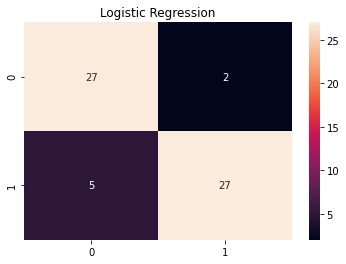

In [29]:
#Confusion matrix heatmap for Logistic regression
plt.title("Logistic Regression")
sns.heatmap(confusion_matrix(y_test,y_pred_logistic),annot=True)
plt.show()

In [30]:
# Logistic Regression
# True Positives: 27 
# True Negatives: 27
# Type 1 Error=> False Positive: 5 
# Type 2 Error=> False Negative: 2

### Random Forest Classifier

In [31]:
#Creating the Random Forest Classifier model
np.random.seed(42)
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
#Predicting/testing the Random Forest Classifier model
y_pred_rfc=random_forest_model.predict(x_test)

In [33]:
#Accuracy and recall values
print("Accuracy score : %0.3f"%accuracy_score(y_test,y_pred_rfc))
print("Recall score   : %0.3f"%recall_score(y_test,y_pred_rfc))
print("F1 score       : %0.3f"%f1_score(y_test,y_pred_rfc))

Accuracy score : 0.869
Recall score   : 0.875
F1 score       : 0.875


In [34]:
#Adding the accuracy scores to the dictionaries
accuracy_values["Random Forest"]=accuracy_score(y_test,y_pred_rfc)*100
recall_values["Random Forest"]=recall_score(y_test,y_pred_rfc)*100

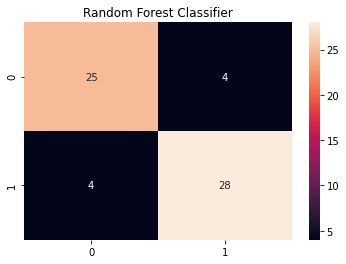

In [35]:
#Confusion matrix heatmap for Random Forest Classifier
plt.title("Random Forest Classifier")
sns.heatmap(confusion_matrix(y_test,y_pred_rfc),annot=True)
plt.show()

In [36]:
# Random Forest Classifier
# True Positives: 25 
# True Negatives: 28
# Type 1 Error=> False Positive: 4 
# Type 2 Error=> False Negative: 4

### KNN Classifier

In [37]:
#Creating the Random Forest Classifier model
np.random.seed(42)
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
#Predicting/testing the Random Forest Classifier model
y_pred_knn=knn_model.predict(x_test)

In [39]:
#Accuracy and recall values
print("Accuracy score : %0.3f"%accuracy_score(y_test,y_pred_knn))
print("Recall score   : %0.3f"%recall_score(y_test,y_pred_knn))
print("F1 score       : %0.3f"%f1_score(y_test,y_pred_knn))

Accuracy score : 0.689
Recall score   : 0.750
F1 score       : 0.716


In [40]:
#Adding the accuracy scores to the dictionaries
accuracy_values["KNN"]=accuracy_score(y_test,y_pred_knn)*100
recall_values["KNN"]=recall_score(y_test,y_pred_knn)*100

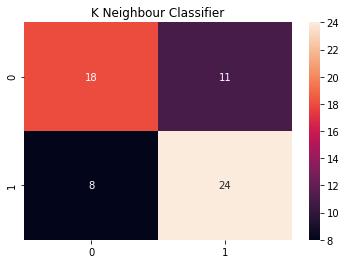

In [41]:
#Confusion matrix heatmap for K Neighbours Classifier
plt.title("K Neighbour Classifier")
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True)
plt.show()

In [42]:
# K Neighbours Classifier
# True Positives: 18
# True Negatives: 24
# Type 1 Error=> False Positive: 8 
# Type 2 Error=> False Negative: 11

### Comparing models

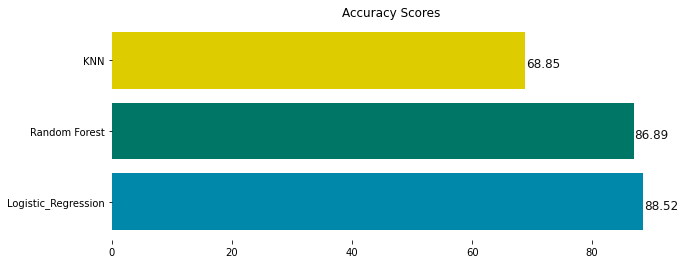

In [43]:
#Plotting Bar graph for Accuracy
fig, ax = plt.subplots(figsize =(10, 4))
plt.title("Accuracy Scores")
# Horizontal Bar Plot
ax.barh(list(accuracy_values.keys()),list(accuracy_values.values()),color=["#0088AA","#007766","#DDCC00"])
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 12,
             color ='#0f0f0f')

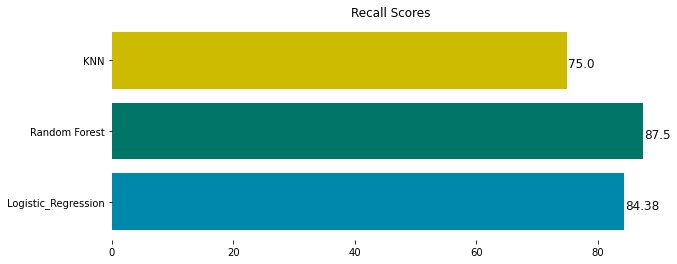

In [44]:
fig, ax = plt.subplots(figsize =(10, 4))
plt.title("Recall Scores")
# Horizontal Bar Plot
ax.barh(list(recall_values.keys()),list(recall_values.values()),color=["#0088AA","#007766","#CCBB00"])
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 12,
             color ='#0f0f0f')